In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from datetime import datetime

import pytz
eastern = pytz.timezone('US/Eastern')

import sailboat as sb # local file sailboat.py
# this is to be able to edit the sailboat.py file and no need to refresh
%load_ext autoreload 
%autoreload 2

In [2]:
cal_nav = pd.ExcelFile('/Users/hboi/Desktop/nav_cal.xlsx')

In [4]:
cdom_cal = cal_nav.parse(0)
cdom_cal

,cdom,cdom ppb
0,469.44,20
1,447.76,20
2,448.35,20
3,458.99,20
4,453.82,20
...,...,...
148,75.85,0
149,80.72,0
150,71.21,0
151,78.46,0


<AxesSubplot:xlabel='cdom', ylabel='cdom ppb'>

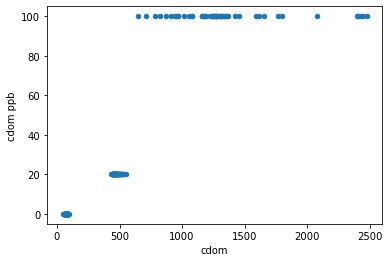

In [5]:
cdom_cal.plot(x='cdom', y='cdom ppb', kind='scatter')

In [9]:
regr = linear_model.LinearRegression()
regr.fit(cdom_cal['cdom'].values.reshape(-1, 1), cdom_cal['cdom ppb'].values.reshape(-1, 1))
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[0.06339736] [-0.27441967]


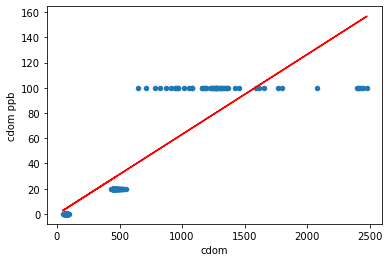

In [36]:
Y_pred = regr.predict(cdom_cal['cdom'].values.reshape(-1, 1))
cdom_cal.plot(x='cdom', y='cdom ppb', kind='scatter')

plt.plot(cdom_cal['cdom'].values.reshape(-1, 1), Y_pred, color='red')
print(regr.coef_[0], regr.intercept_)

<AxesSubplot:xlabel='cdom', ylabel='cdom ppb'>

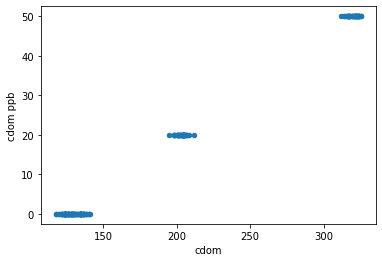

In [62]:
flu_cal = cal_nav.parse(1)
flu_cal.plot(x='cdom', y='cdom ppb', kind='scatter')

In [64]:
regr2 = linear_model.LinearRegression()
regr2.fit(flu_cal['cdom'].values.reshape(-1, 1), flu_cal['cdom ppb'].values.reshape(-1, 1))
regr2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[0.2615415] [-33.60887178]


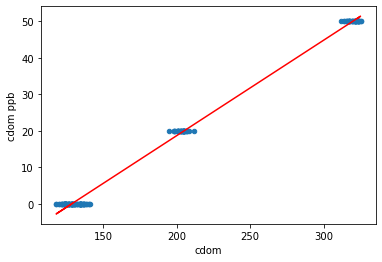

In [65]:
Y_pred2 = regr2.predict(flu_cal['cdom'].values.reshape(-1, 1))
flu_cal.plot(x='cdom', y='cdom ppb', kind='scatter')

plt.plot(flu_cal['cdom'].values.reshape(-1, 1), Y_pred2, color='red')
print(regr2.coef_[0], regr2.intercept_)

In [25]:
url, dates = sb.gen_url(telemetry='min', CI='all',
                        BB3=None, CT='min', O2=None,
                       date_interval=('2021-04-29', '2021-04-30'),)
df = sb.get_data(url, dates)

Data variables are: ['GPSTimeStamp', 'CI [Time UTC]']


In [26]:
df.set_index('local time', inplace=True)

<AxesSubplot:xlabel='local time'>

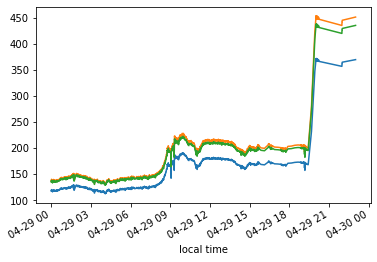

In [42]:
(df['CDOM [counts]']*regr.coef_[0] + regr.intercept_).plot()
(df['CDOM [counts]']*.0791 -10.203).plot()
((df['CDOM [counts]'] - 71.46)/13.239).plot()
flu['cdom']

In [70]:
flu = pd.read_csv('/Users/hboi/Desktop/archive_23_ASCII.059', sep='\t', parse_dates={'Datetime': ['date', 'time']})
flu['local time'] = flu['Datetime'].dt.tz_localize('utc').dt.tz_convert(eastern)

In [71]:
flu.set_index('local time', inplace=True)

<AxesSubplot:xlabel='local time'>

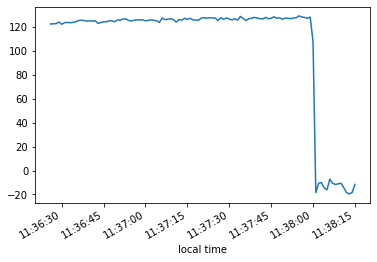

In [72]:
(flu['cdom']*regr2.coef_[0] + regr2.intercept_).plot()


<AxesSubplot:xlabel='local time'>

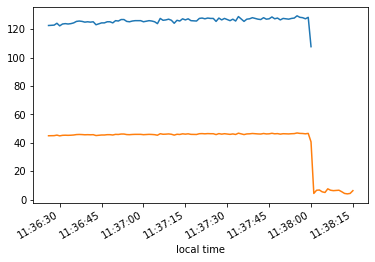

In [88]:
cdom = flu['cdom']*regr2.coef_[0] + regr2.intercept_
fact = flu['cdom']*0.0753
cdom = cdom.where(cdom>0)
cdom.plot()
fact.plot()

<AxesSubplot:xlabel='local time'>

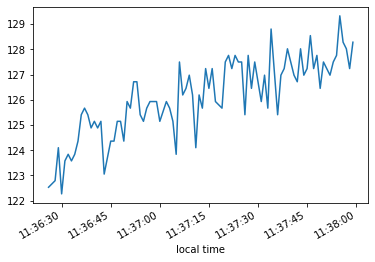

In [83]:
cdom[:-15].plot()

(0.0, 400.0)

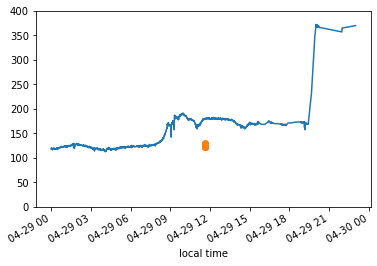

In [87]:
(df['CDOM [counts]']*regr.coef_[0] + regr.intercept_).plot()
cdom[:-15].plot(marker='o')
plt.ylim(0, 400)

In [ ]:


day = mdf[(mdf['local time'].dt.day==29)]
fig, axes = plt.subplots(6, figsize=(10,12), sharex=True)

vnames = ['Temperature [deg C]', 'Conductivity [mS cm-1]', 'O2 Concentration [micromolar]', 
       'Chl. a [ppb]', 'CDOM [QSU]', 'Phycocyanin [ppb]']
vvals = [26.08552397, 0.033017043*10, 7.669923357/ 1.42903*44.66,
         8.261545995, 33.25230548, 50.03059286, 1242.279958]
vmax = [27, 1., 100, 100, 100, 100]
for i in range(6):
    day.plot(x='local time', y=vnames[i], ax=axes[i])
#     axes[i].set_ylim(0, vmax[i])
    axes[i].plot(datetime(2021,4,29,9,10, tzinfo=eastern), vvals[i], 'ko')
axes[1].set_ylim(0,1)
axes[3].plot(datetime(2021,4,29,9,10, tzinfo=eastern), 120.517088607595, 'ro')

In [105]:
url, dates = sb.gen_url(telemetry='min', CI='all',
                        BB3=None, CT=None, O2=None,
                       date_interval=('2021-04-01', '2021-04-30'),
                       limit=20000)
df = sb.get_data(url, dates)

Data variables are: ['GPSTimeStamp', 'CI [Time UTC]']


In [101]:
df['cdom'] = df['CDOM [counts]']*regr.coef_[0] + regr.intercept_

<AxesSubplot:xlabel='local time'>

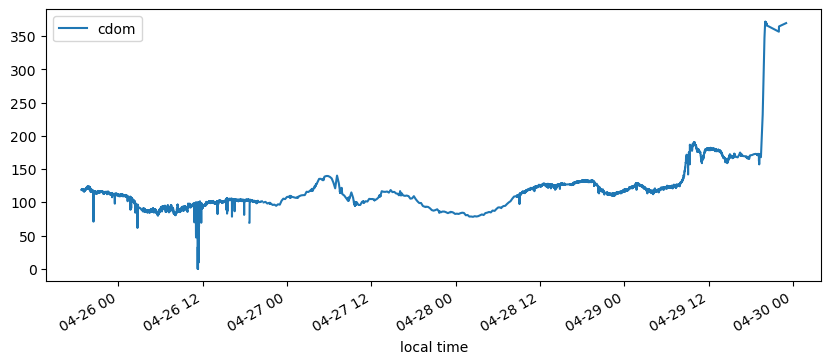

In [102]:
fig,ax = plt.subplots(figsize=(10, 4), dpi=100)
df.plot(x='local time', y='cdom', ax=ax)


In [103]:
url

'http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CTrack%2CHeading%2CCI+%5BTime+UTC%5D%2CChl.+a+%5Bcounts%5D%2CCDOM+%5Bcounts%5D%2CPhycocyanin+%5Bcounts%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D&format=csv&output=file&start=2021-04-01+04%3A00%3A00&end=2021-04-30+04%3A00%3A00&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835'

In [106]:
df

,GPSTimeStamp,Lon,Lat,Track,Heading,CI [Time UTC],Chl. a [counts],CDOM [counts],Phycocyanin [counts],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,,
320918,2021-04-30 03:01:13,-80.796425,27.222748,3.0,97.2,2021-04-30 03:01:11,2865.67,5836.02,524.32,NaN,144.06,21.37,2021-04-29 23:01:13-04:00
320527,2021-04-30 02:00:51,-80.796432,27.222757,0.0,95.5,2021-04-30 02:00:30,3211.47,5757.90,509.28,NaN,163.43,20.64,2021-04-29 22:00:51-04:00
320524,2021-04-30 02:00:31,-80.796425,27.222759,0.0,95.4,2021-04-30 02:00:30,3211.47,5757.90,509.28,NaN,163.43,20.64,2021-04-29 22:00:31-04:00
320521,2021-04-30 02:00:11,-80.796425,27.222748,0.0,95.9,2021-04-30 01:59:30,3294.58,5718.15,463.68,NaN,168.09,18.43,2021-04-29 22:00:11-04:00
320517,2021-04-30 01:59:47,-80.796425,27.222740,0.0,96.2,2021-04-30 01:59:30,3294.58,5718.15,463.68,NaN,168.09,18.43,2021-04-29 21:59:47-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309348,2021-04-25 22:48:22,-80.670792,26.859690,120.0,123.1,2021-04-25 22:48:01,434.19,1871.90,115.04,NaN,7.82,1.52,2021-04-25 18:48:22-04:00
309347,2021-04-25 22:48:01,-80.670937,26.859835,145.5,150.9,2021-04-25 22:48:01,434.19,1871.90,115.04,NaN,7.82,1.52,2021-04-25 18:48:01-04:00
309346,2021-04-25 22:47:41,-80.671089,26.859932,169.2,176.3,2021-04-25 22:47:01,433.70,1875.03,122.76,NaN,7.80,1.89,2021-04-25 18:47:41-04:00
